In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## import seaborn
import seaborn as sns
import pandas as pd
import warnings
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
SME1=pd.read_csv("social_media_engagement.csv")

In [4]:
SME1

post_id   platform post_type         post_time  \
0          1   Facebook     image  2023-08-17 14:45   
1          2   Facebook  carousel  2023-05-14 00:45   
2          3  Instagram      poll  2023-02-21 16:15   
3          4    Twitter     image  2023-11-16 00:45   
4          5    Twitter     video  2023-05-23 00:30   
..       ...        ...       ...               ...   
995      996  Instagram     video  2023-04-25 07:15   
996      997    Twitter     image  2023-09-09 07:30   
997      998  Instagram     video  2023-08-18 23:15   
998      999   Facebook      text  2023-10-05 00:15   
999     1000    Twitter      poll  2023-09-11 21:15   

                         caption                          hashtags  likes  \
0               Best day ever! 🎉                           #Social   2121   
1         Here's a quick update.      #Family, #Community, #Events   3660   
2             Not my best day. 😞    #Beauty, #Fashion, #InstaDaily   4955   
3    Disappointed but moving on.  #Trending, #Tech, #Entertainment   1183   
4               Exciting news! 🚀  #News, #Politics, #Entertainment   3499   
..                           ...                               ...    ...   
995           Not my best day. 😞           #Beauty, #Travel, #Tech   5000   
996             Could be better.    #Tech, #Sports, #Entertainment    880   
997          Feeling down today.                      #Photography   5000   
998             Best day ever! 🎉                          #Friends   1075   
999       Here's a quick update.                #Trending, #Sports    485   

     comments  shares  caption_length  num_hashtags  post_hour  post_day  \
0         474     628              16             1         14  Thursday   
1         432     694              22             3          0    Sunday   
2         408     688              18             3         16   Tuesday   
3          90     187              27             3          0  Thursday   
4         247     286              16             3          0   Tuesday   
..        ...     ...             ...           ...        ...       ...   
995       338     420              18             3          7   Tuesday   
996        90      45              16             3          7  Saturday   
997       263     274              19             1         23    Friday   
998        46      21              16             1          0  Thursday   
999       195     173              22             2         21    Monday   

    sentiment_score  
0          positive  
1           neutral  
2          negative  
3          negative  
4          positive  
..              ...  
995        negative  
996        negative  
997        negative  
998        positive  
999         neutral  

[1000 rows x 14 columns]

In [5]:
SME1.shape


(1000, 14)

In [6]:
SME1.columns.unique()

Index(['post_id', 'platform', 'post_type', 'post_time', 'caption', 'hashtags',
       'likes', 'comments', 'shares', 'caption_length', 'num_hashtags',
       'post_hour', 'post_day', 'sentiment_score'],
      dtype='object')

In [7]:
SME1.describe(include='all').style.background_gradient(cmap='Blues')


In [8]:
SME1.isna().sum().sort_values(ascending = False)

post_id            0
platform           0
post_type          0
post_time          0
caption            0
hashtags           0
likes              0
comments           0
shares             0
caption_length     0
num_hashtags       0
post_hour          0
post_day           0
sentiment_score    0
dtype: int64

In [9]:
SME1.isna().sum().sum()

0

Text(0.5, 1.0, 'Missing null values')

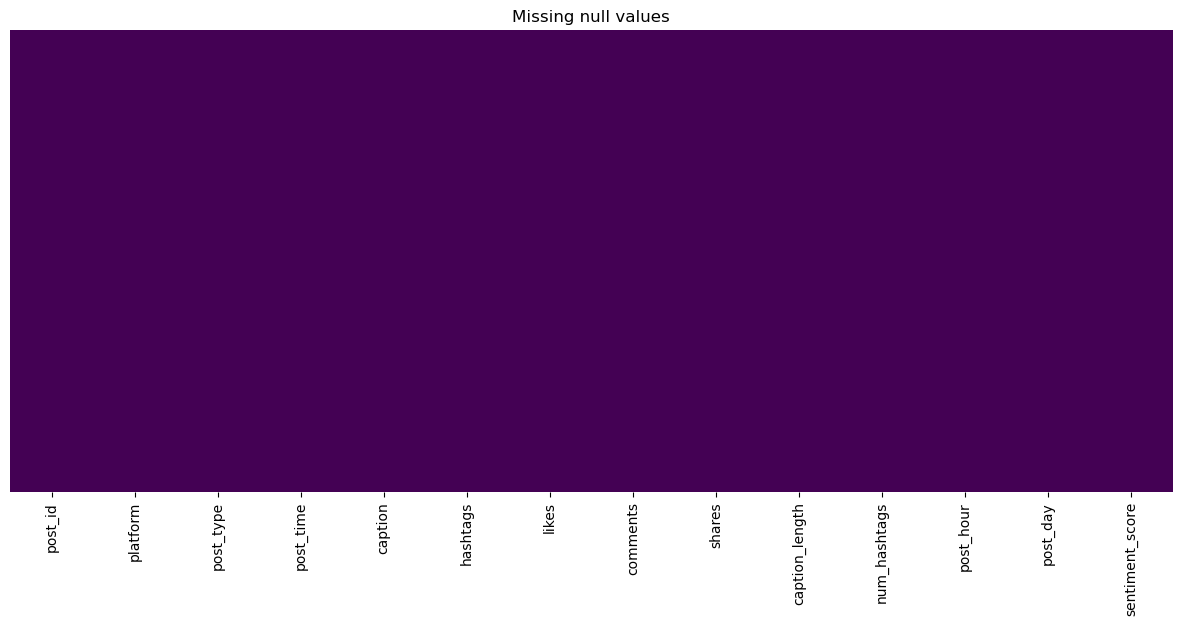

In [10]:
plt.rcParams['figure.figsize'] = (15,6)
sns.heatmap(SME1.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

In [11]:
SME1.drop_duplicates(keep='last', inplace=True)


In [12]:
SME1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          1000 non-null   int64 
 1   platform         1000 non-null   object
 2   post_type        1000 non-null   object
 3   post_time        1000 non-null   object
 4   caption          1000 non-null   object
 5   hashtags         1000 non-null   object
 6   likes            1000 non-null   int64 
 7   comments         1000 non-null   int64 
 8   shares           1000 non-null   int64 
 9   caption_length   1000 non-null   int64 
 10  num_hashtags     1000 non-null   int64 
 11  post_hour        1000 non-null   int64 
 12  post_day         1000 non-null   object
 13  sentiment_score  1000 non-null   object
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [13]:
SME1 = SME1.iloc[:, 1:]
SME1

platform post_type         post_time                      caption  \
0     Facebook     image  2023-08-17 14:45             Best day ever! 🎉   
1     Facebook  carousel  2023-05-14 00:45       Here's a quick update.   
2    Instagram      poll  2023-02-21 16:15           Not my best day. 😞   
3      Twitter     image  2023-11-16 00:45  Disappointed but moving on.   
4      Twitter     video  2023-05-23 00:30             Exciting news! 🚀   
..         ...       ...               ...                          ...   
995  Instagram     video  2023-04-25 07:15           Not my best day. 😞   
996    Twitter     image  2023-09-09 07:30             Could be better.   
997  Instagram     video  2023-08-18 23:15          Feeling down today.   
998   Facebook      text  2023-10-05 00:15             Best day ever! 🎉   
999    Twitter      poll  2023-09-11 21:15       Here's a quick update.   

                             hashtags  likes  comments  shares  \
0                             #Social   2121       474     628   
1        #Family, #Community, #Events   3660       432     694   
2      #Beauty, #Fashion, #InstaDaily   4955       408     688   
3    #Trending, #Tech, #Entertainment   1183        90     187   
4    #News, #Politics, #Entertainment   3499       247     286   
..                                ...    ...       ...     ...   
995           #Beauty, #Travel, #Tech   5000       338     420   
996    #Tech, #Sports, #Entertainment    880        90      45   
997                      #Photography   5000       263     274   
998                          #Friends   1075        46      21   
999                #Trending, #Sports    485       195     173   

     caption_length  num_hashtags  post_hour  post_day sentiment_score  
0                16             1         14  Thursday        positive  
1                22             3          0    Sunday         neutral  
2                18             3         16   Tuesday        negative  
3                27             3          0  Thursday        negative  
4                16             3          0   Tuesday        positive  
..              ...           ...        ...       ...             ...  
995              18             3          7   Tuesday        negative  
996              16             3          7  Saturday        negative  
997              19             1         23    Friday        negative  
998              16             1          0  Thursday        positive  
999              22             2         21    Monday         neutral  

[1000 rows x 13 columns]

In [14]:
SME1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   platform         1000 non-null   object
 1   post_type        1000 non-null   object
 2   post_time        1000 non-null   object
 3   caption          1000 non-null   object
 4   hashtags         1000 non-null   object
 5   likes            1000 non-null   int64 
 6   comments         1000 non-null   int64 
 7   shares           1000 non-null   int64 
 8   caption_length   1000 non-null   int64 
 9   num_hashtags     1000 non-null   int64 
 10  post_hour        1000 non-null   int64 
 11  post_day         1000 non-null   object
 12  sentiment_score  1000 non-null   object
dtypes: int64(6), object(7)
memory usage: 101.7+ KB


# EDA

In [16]:
categorical_col = SME1.select_dtypes(include='object').columns 
categorical_col

Index(['platform', 'post_type', 'post_time', 'caption', 'hashtags', 'post_day',
       'sentiment_score'],
      dtype='object')

In [17]:
numerical_col = SME1.select_dtypes(include=['int64','float64']).columns 
numerical_col

Index(['likes', 'comments', 'shares', 'caption_length', 'num_hashtags',
       'post_hour'],
      dtype='object')

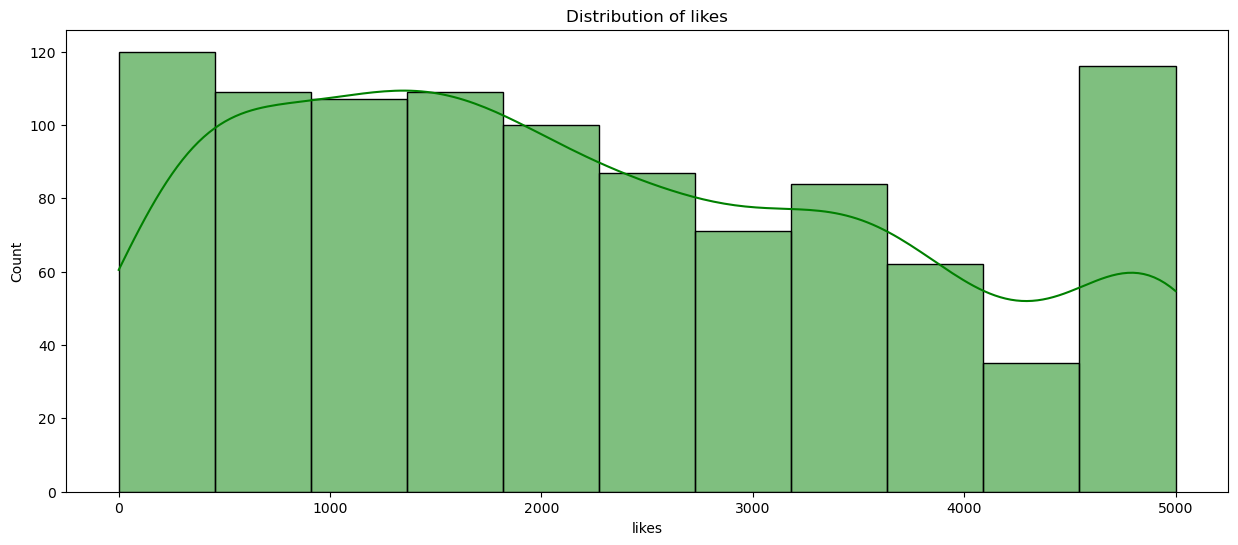

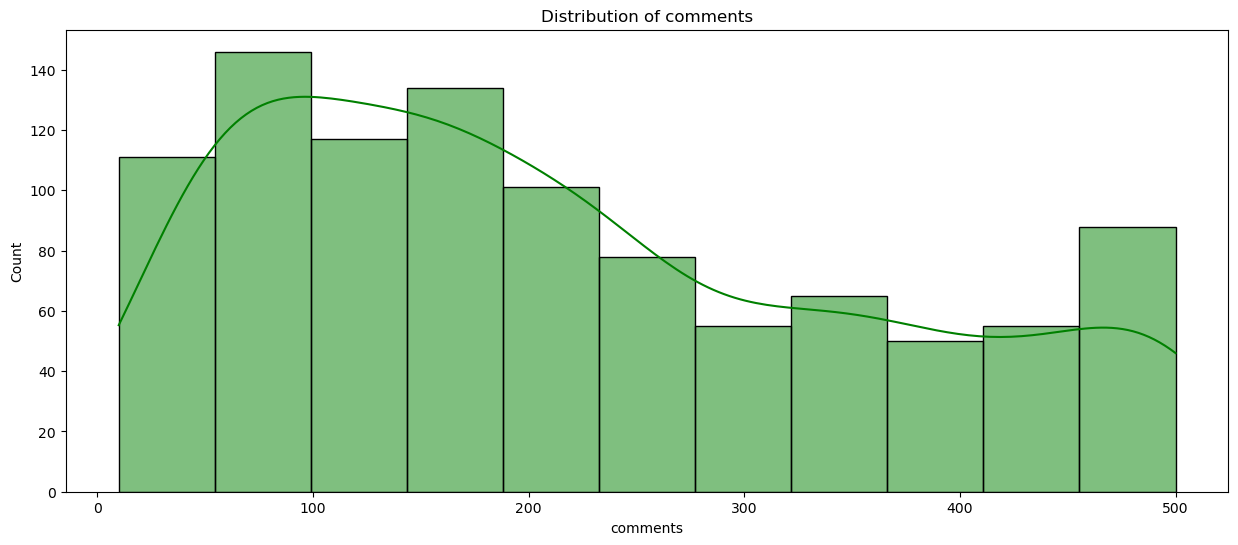

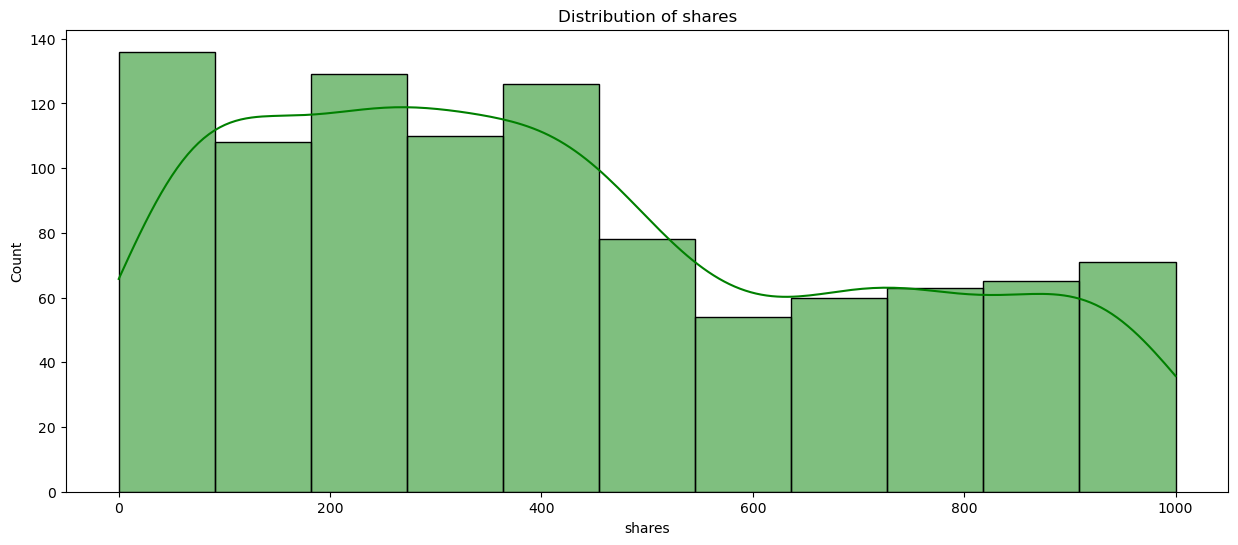

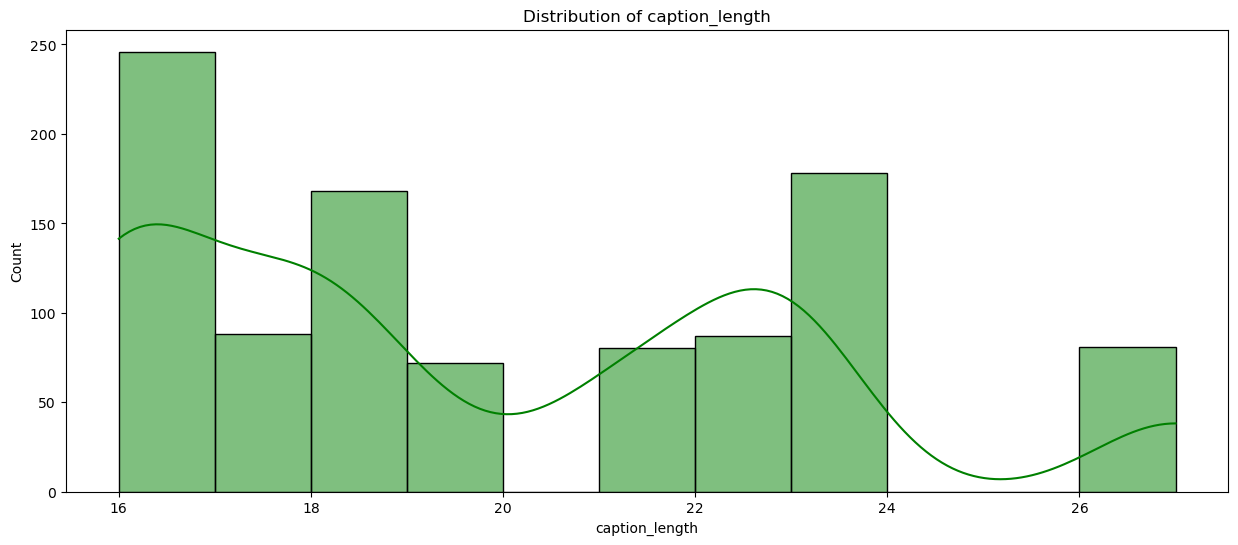

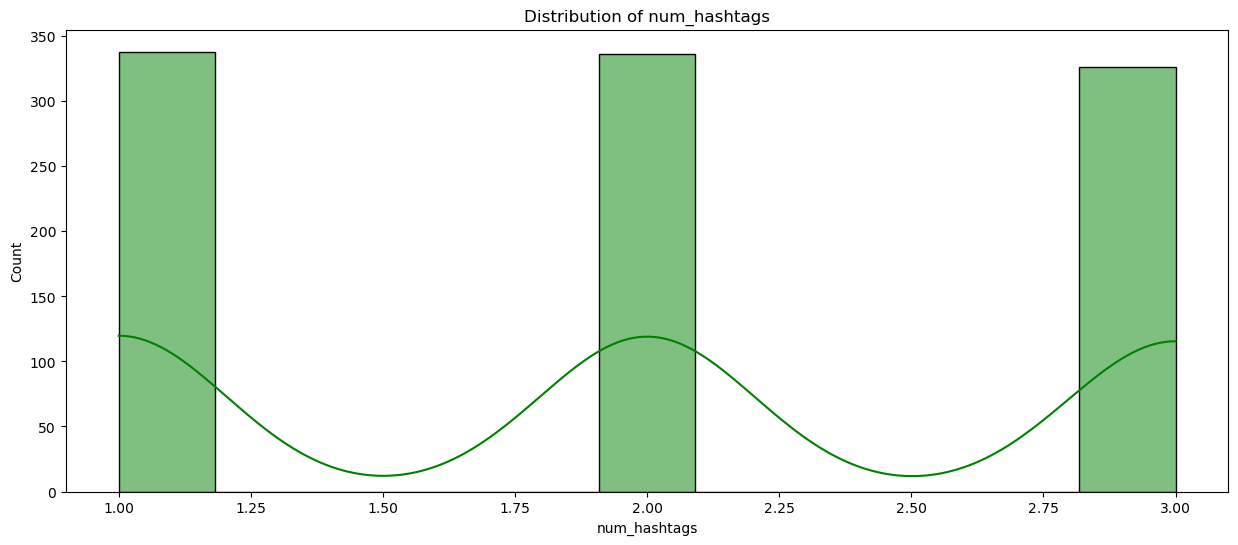

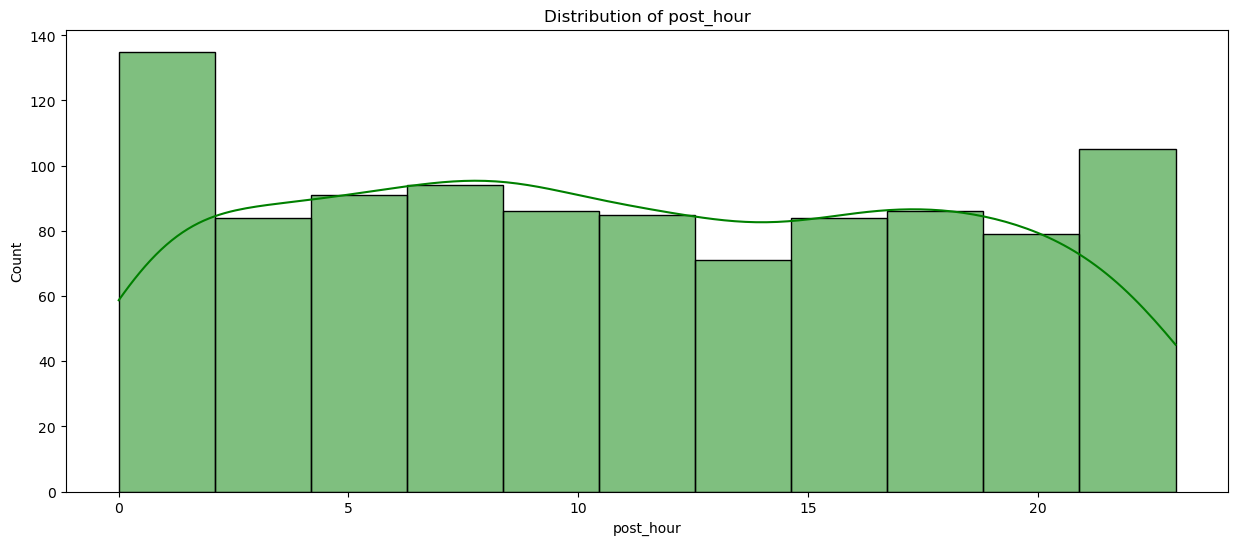

In [18]:
for col in numerical_col:
    sns.histplot(SME1[col], kde=True, color='green')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.show()

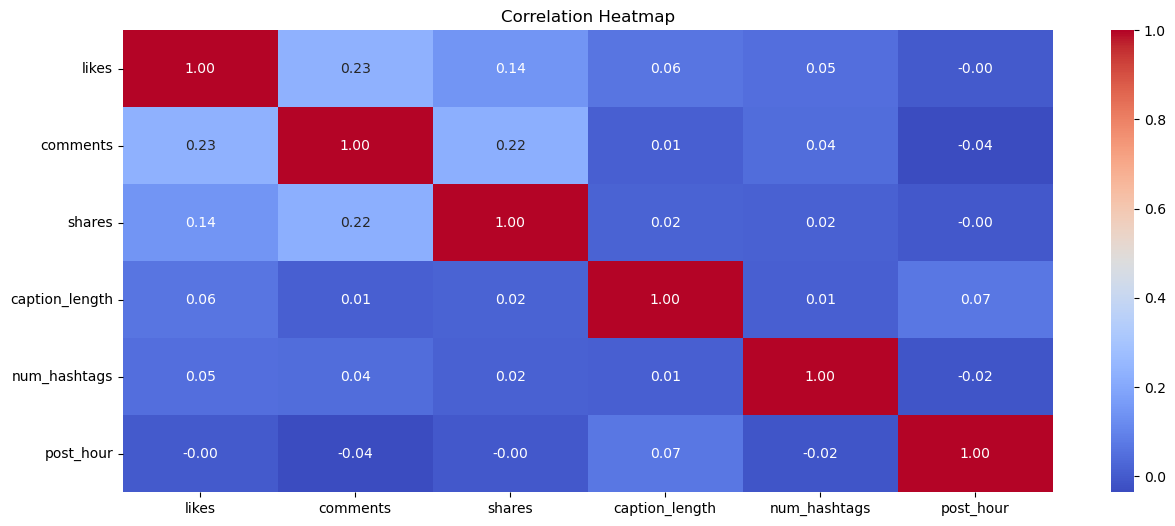

In [19]:
sns.heatmap(SME1[numerical_col].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
SME1['platform'].value_counts()

platform
Instagram    345
Twitter      328
Facebook     327
Name: count, dtype: int64

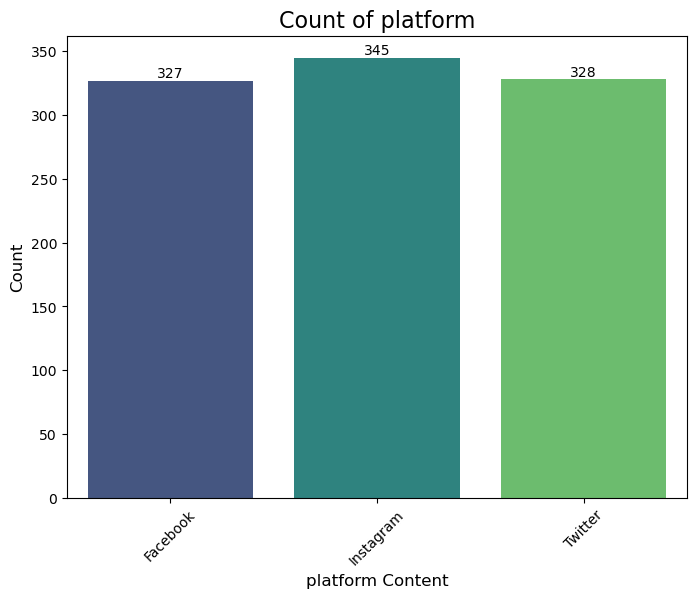

In [21]:
plt.figure(figsize=(8, 6))
label=sns.countplot(data=SME1, x='platform', palette='viridis')
for i in label.containers:
    label.bar_label(i)
plt.title('Count of platform', fontsize=16)
plt.xlabel('platform Content', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [22]:
SME1['post_type'].value_counts()

post_type
poll        212
carousel    207
text        205
image       193
video       183
Name: count, dtype: int64

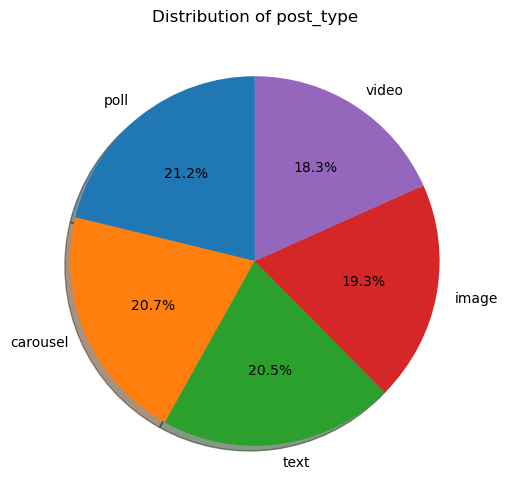

In [23]:
SME1['post_type'].value_counts().plot.pie(
    autopct='%1.1f%%', shadow=True, startangle=90, figsize=(6,6)
)
plt.ylabel('')  # Removes y-axis label
plt.title('Distribution of post_type')
plt.show()

In [24]:
SME1['post_time'].value_counts()

post_time
2023-09-20 13:30    2
2023-01-30 13:30    2
2023-07-07 07:00    2
2023-10-09 19:15    2
2023-08-10 12:00    2
                   ..
2023-10-21 18:15    1
2023-08-30 01:45    1
2023-03-21 02:15    1
2023-04-01 14:45    1
2023-09-11 21:15    1
Name: count, Length: 986, dtype: int64

In [25]:
SME1['post_time']=pd.to_datetime(SME1['post_time'],errors='coerce')

In [26]:
SME1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   platform         1000 non-null   object        
 1   post_type        1000 non-null   object        
 2   post_time        1000 non-null   datetime64[ns]
 3   caption          1000 non-null   object        
 4   hashtags         1000 non-null   object        
 5   likes            1000 non-null   int64         
 6   comments         1000 non-null   int64         
 7   shares           1000 non-null   int64         
 8   caption_length   1000 non-null   int64         
 9   num_hashtags     1000 non-null   int64         
 10  post_hour        1000 non-null   int64         
 11  post_day         1000 non-null   object        
 12  sentiment_score  1000 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 101.7+ KB


In [27]:
SME1['day'] = SME1['post_time'].dt.day
SME1['month'] = SME1['post_time'].dt.month
SME1['year'] = SME1['post_time'].dt.year
SME1['month_name'] = SME1['post_time'].dt.month_name()
SME1['hour'] = SME1["post_time"].dt.hour  
SME1['min'] = SME1["post_time"].dt.minute 


In [28]:
SME1.head()


platform post_type           post_time                      caption  \
0   Facebook     image 2023-08-17 14:45:00             Best day ever! 🎉   
1   Facebook  carousel 2023-05-14 00:45:00       Here's a quick update.   
2  Instagram      poll 2023-02-21 16:15:00           Not my best day. 😞   
3    Twitter     image 2023-11-16 00:45:00  Disappointed but moving on.   
4    Twitter     video 2023-05-23 00:30:00             Exciting news! 🚀   

                           hashtags  likes  comments  shares  caption_length  \
0                           #Social   2121       474     628              16   
1      #Family, #Community, #Events   3660       432     694              22   
2    #Beauty, #Fashion, #InstaDaily   4955       408     688              18   
3  #Trending, #Tech, #Entertainment   1183        90     187              27   
4  #News, #Politics, #Entertainment   3499       247     286              16   

   num_hashtags  post_hour  post_day sentiment_score  day  month  year  \
0             1         14  Thursday        positive   17      8  2023   
1             3          0    Sunday         neutral   14      5  2023   
2             3         16   Tuesday        negative   21      2  2023   
3             3          0  Thursday        negative   16     11  2023   
4             3          0   Tuesday        positive   23      5  2023   

  month_name  hour  min  
0     August    14   45  
1        May     0   45  
2   February    16   15  
3   November     0   45  
4        May     0   30

In [29]:
SME1.drop(["post_time"],axis=1,inplace=True)

In [30]:
SME1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   platform         1000 non-null   object
 1   post_type        1000 non-null   object
 2   caption          1000 non-null   object
 3   hashtags         1000 non-null   object
 4   likes            1000 non-null   int64 
 5   comments         1000 non-null   int64 
 6   shares           1000 non-null   int64 
 7   caption_length   1000 non-null   int64 
 8   num_hashtags     1000 non-null   int64 
 9   post_hour        1000 non-null   int64 
 10  post_day         1000 non-null   object
 11  sentiment_score  1000 non-null   object
 12  day              1000 non-null   int32 
 13  month            1000 non-null   int32 
 14  year             1000 non-null   int32 
 15  month_name       1000 non-null   object
 16  hour             1000 non-null   int32 
 17  min              1000 non-null   i

In [31]:
categorical_col1 = SME1.select_dtypes(include='object').columns 
categorical_col1

Index(['platform', 'post_type', 'caption', 'hashtags', 'post_day',
       'sentiment_score', 'month_name'],
      dtype='object')

In [32]:
numerical_col1 = SME1.select_dtypes(include=['int64','float64']).columns 

In [33]:
numerical_col1

Index(['likes', 'comments', 'shares', 'caption_length', 'num_hashtags',
       'post_hour'],
      dtype='object')

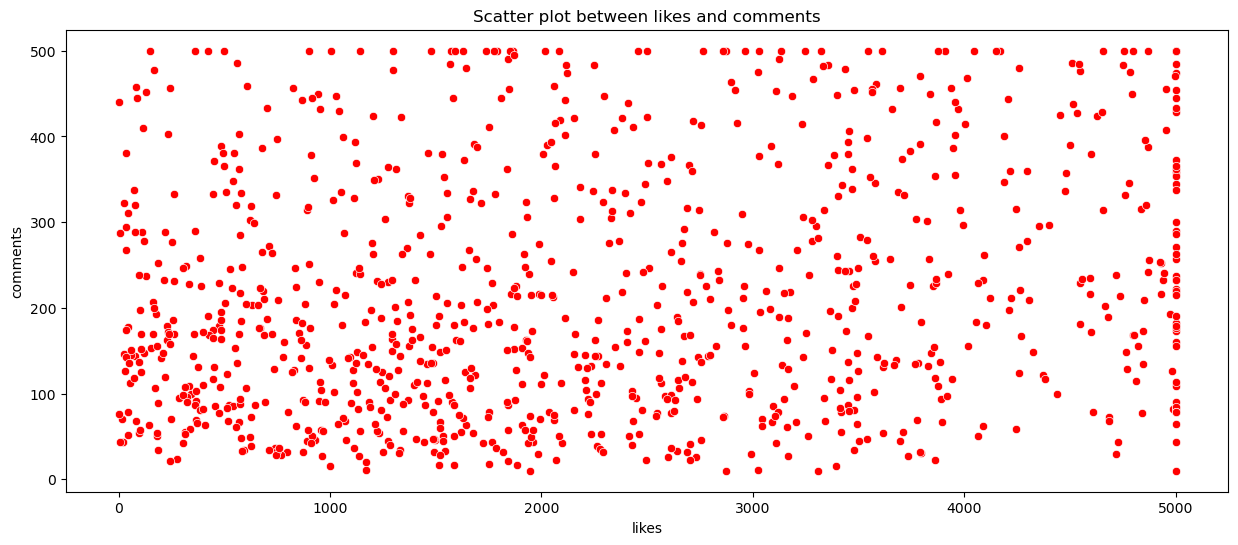

In [36]:
sns.scatterplot(x=SME1[numerical_col1[0]], y=SME1[numerical_col1[1]], color='red')
plt.title(f'Scatter plot between {numerical_col1[0]} and {numerical_col1[1]}')
plt.show()

In [37]:
SME1['caption'].value_counts()

caption
Loving this new vibe! 😍        93
Not my best day. 😞             92
Just another day.              88
Best day ever! 🎉               87
Here's a quick update.         87
New post, check it out!        85
Exciting news! 🚀               83
Disappointed but moving on.    81
Amazing experience! 🌟          80
What do you think?             76
Could be better.               76
Feeling down today.            72
Name: count, dtype: int64

In [44]:
SME1_caption = pd.DataFrame(SME1['caption'].apply(lambda x: str(x).split(', ')).tolist(),index = SME1['platform'])
SME1_caption

0     1
platform                                    
Facebook              Best day ever! 🎉  None
Facebook        Here's a quick update.  None
Instagram           Not my best day. 😞  None
Twitter    Disappointed but moving on.  None
Twitter               Exciting news! 🚀  None
...                                ...   ...
Instagram           Not my best day. 😞  None
Twitter               Could be better.  None
Instagram          Feeling down today.  None
Facebook              Best day ever! 🎉  None
Twitter         Here's a quick update.  None

[1000 rows x 2 columns]

In [45]:
SME1_caption = SME1_caption.stack()
SME1_caption


platform    
Facebook   0               Best day ever! 🎉
           0         Here's a quick update.
Instagram  0             Not my best day. 😞
Twitter    0    Disappointed but moving on.
           0               Exciting news! 🚀
                           ...             
Instagram  0             Not my best day. 😞
Twitter    0               Could be better.
Instagram  0            Feeling down today.
Facebook   0               Best day ever! 🎉
Twitter    0         Here's a quick update.
Length: 1085, dtype: object

In [46]:
SME1_caption = pd.DataFrame(SME1_caption)
SME1_caption

0
platform                                
Facebook  0             Best day ever! 🎉
          0       Here's a quick update.
Instagram 0           Not my best day. 😞
Twitter   0  Disappointed but moving on.
          0             Exciting news! 🚀
...                                  ...
Instagram 0           Not my best day. 😞
Twitter   0             Could be better.
Instagram 0          Feeling down today.
Facebook  0             Best day ever! 🎉
Twitter   0       Here's a quick update.

[1085 rows x 1 columns]

In [47]:
SME1_caption.reset_index(inplace = True)
SME1_caption = SME1_caption[['platform',0]]
SME1_caption.columns = ['platform','caption']
SME1_caption.replace('nan',np.NaN,inplace = True)
SME1_caption.isna().sum()

platform    0
caption     0
dtype: int64

In [49]:
SME1_caption

platform                      caption
0      Facebook             Best day ever! 🎉
1      Facebook       Here's a quick update.
2     Instagram           Not my best day. 😞
3       Twitter  Disappointed but moving on.
4       Twitter             Exciting news! 🚀
...         ...                          ...
1080  Instagram           Not my best day. 😞
1081    Twitter             Could be better.
1082  Instagram          Feeling down today.
1083   Facebook             Best day ever! 🎉
1084    Twitter       Here's a quick update.

[1085 rows x 2 columns]

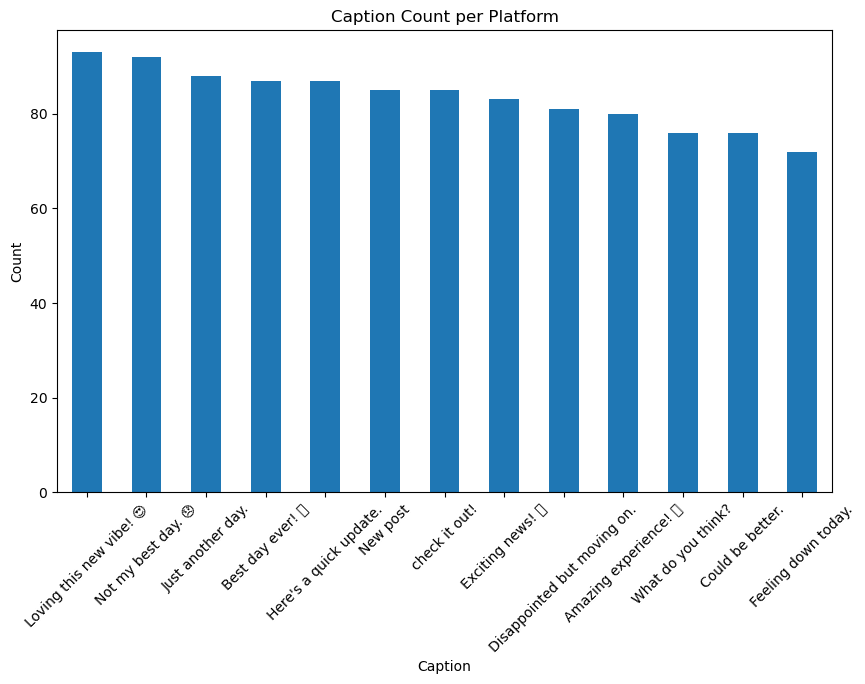

In [50]:

# Count the number of captions per platform
caption_counts = SME1_caption['caption'].value_counts()

# Create a bar chart
plt.figure(figsize=(10,6))
caption_counts.plot(kind='bar')
plt.title('Caption Count per Platform')
plt.xlabel('Caption')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [51]:
SME1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   platform         1000 non-null   object
 1   post_type        1000 non-null   object
 2   caption          1000 non-null   object
 3   hashtags         1000 non-null   object
 4   likes            1000 non-null   int64 
 5   comments         1000 non-null   int64 
 6   shares           1000 non-null   int64 
 7   caption_length   1000 non-null   int64 
 8   num_hashtags     1000 non-null   int64 
 9   post_hour        1000 non-null   int64 
 10  post_day         1000 non-null   object
 11  sentiment_score  1000 non-null   object
 12  day              1000 non-null   int32 
 13  month            1000 non-null   int32 
 14  year             1000 non-null   int32 
 15  month_name       1000 non-null   object
 16  hour             1000 non-null   int32 
 17  min              1000 non-null   i

In [52]:
SME1_post_type = pd.DataFrame(SME1['post_type'].apply(lambda x: str(x).split(', ')).tolist(),index = SME1['platform'])
SME1_post_type = SME1_post_type.stack()
SME1_post_type = pd.DataFrame(SME1_post_type)
SME1_post_type.reset_index(inplace = True)
SME1_post_type = SME1_post_type[['platform',0]]
SME1_post_type.columns = ['platform','post_type']
SME1_post_type.replace('nan',np.NaN,inplace = True)
SME1_post_type.isna().sum()

platform     0
post_type    0
dtype: int64

In [53]:
SME1_post_type

platform post_type
0     Facebook     image
1     Facebook  carousel
2    Instagram      poll
3      Twitter     image
4      Twitter     video
..         ...       ...
995  Instagram     video
996    Twitter     image
997  Instagram     video
998   Facebook      text
999    Twitter      poll

[1000 rows x 2 columns]

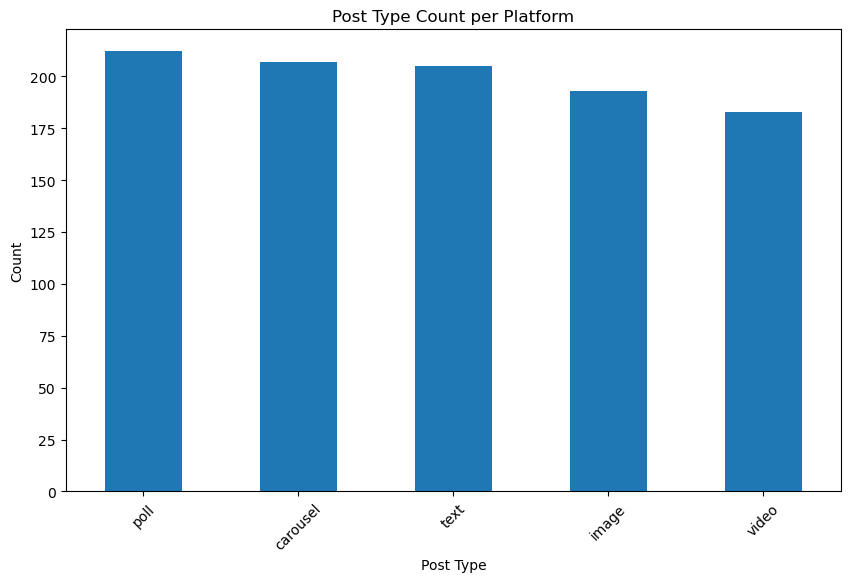

In [54]:
# Count the number of occurrences of each post_type per platform
post_type_counts = SME1_post_type['post_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10,6))
post_type_counts.plot(kind='bar')
plt.title('Post Type Count per Platform')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [55]:
SME1_hashtags = pd.DataFrame(SME1['hashtags'].apply(lambda x: str(x).split(', ')).tolist(), index=SME1['platform'])
SME1_hashtags = SME1_hashtags.stack().reset_index(name='hashtags')  # Stack and reset index
SME1_hashtags = SME1_hashtags[['platform', 'hashtags']]  # Keep only the necessary columns
SME1_hashtags.replace('nan', np.NaN, inplace=True)  # Replace 'nan' string with NaN
SME1_hashtags = SME1_hashtags.isna().sum()  # Count missing values

In [56]:
SME1_hashtags

platform    0
hashtags    0
dtype: int64

In [57]:
SME1.groupby('platform')['likes'].count()

platform
Facebook     327
Instagram    345
Twitter      328
Name: likes, dtype: int64

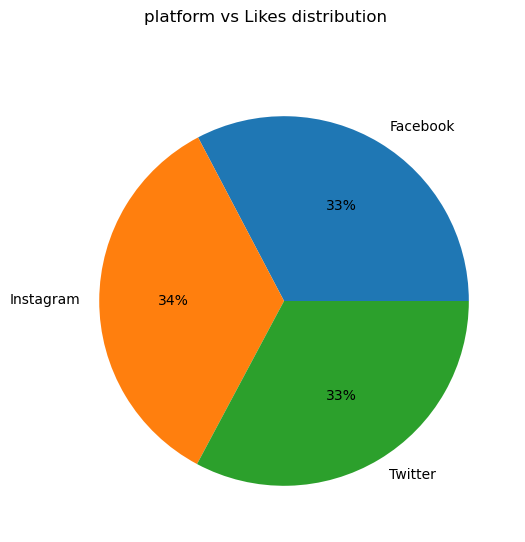

<Figure size 1500x600 with 0 Axes>

In [58]:
# Group by platform and get count of 'likes'
platform_counts = SME1.groupby('platform')['likes'].count()

# Create a pie chart for platform distribution
plt.pie(platform_counts, labels=platform_counts.index, autopct='%0.0f%%')
plt.suptitle("platform vs Likes distribution")
plt.show()

# Save the plot as a PNG image
plt.savefig("1.png")

In [60]:
SME1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   platform         1000 non-null   object
 1   post_type        1000 non-null   object
 2   caption          1000 non-null   object
 3   hashtags         1000 non-null   object
 4   likes            1000 non-null   int64 
 5   comments         1000 non-null   int64 
 6   shares           1000 non-null   int64 
 7   caption_length   1000 non-null   int64 
 8   num_hashtags     1000 non-null   int64 
 9   post_hour        1000 non-null   int64 
 10  post_day         1000 non-null   object
 11  sentiment_score  1000 non-null   object
 12  day              1000 non-null   int32 
 13  month            1000 non-null   int32 
 14  year             1000 non-null   int32 
 15  month_name       1000 non-null   object
 16  hour             1000 non-null   int32 
 17  min              1000 non-null   i

In [61]:
# Step 1: Split and stack the 'comments' column
SME1_comments = pd.DataFrame(SME1['comments'].apply(lambda x: str(x).split(', ')).tolist(), index=SME1['platform'])
SME1_comments = SME1_comments.stack()

# Step 2: Convert to DataFrame
SME1_comments = pd.DataFrame(SME1_comments)

# Step 3: Reset index to flatten the structure
SME1_comments.reset_index(inplace=True)

# Step 4: Rename columns
SME1_comments = SME1_comments[['platform', 0]]
SME1_comments.columns = ['platform', 'comments']

# Step 5: Replace string 'nan' with np.NaN
SME1_comments.replace('nan', np.NaN, inplace=True)

# Step 6: Check for missing values
missing_values = SME1_comments.isna().sum()

# Output the result for missing values
print(missing_values)


platform    0
comments    0
dtype: int64


In [62]:
SME1_comments

platform comments
0     Facebook      474
1     Facebook      432
2    Instagram      408
3      Twitter       90
4      Twitter      247
..         ...      ...
995  Instagram      338
996    Twitter       90
997  Instagram      263
998   Facebook       46
999    Twitter      195

[1000 rows x 2 columns]

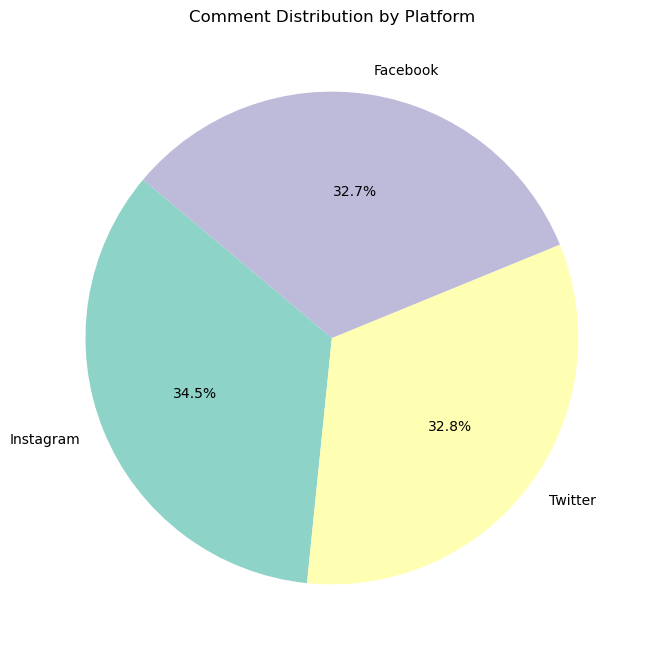

In [63]:
# Count the comments by platform
comments_count = SME1_comments['platform'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(comments_count, labels=comments_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(comments_count)))
plt.title('Comment Distribution by Platform')
plt.show()


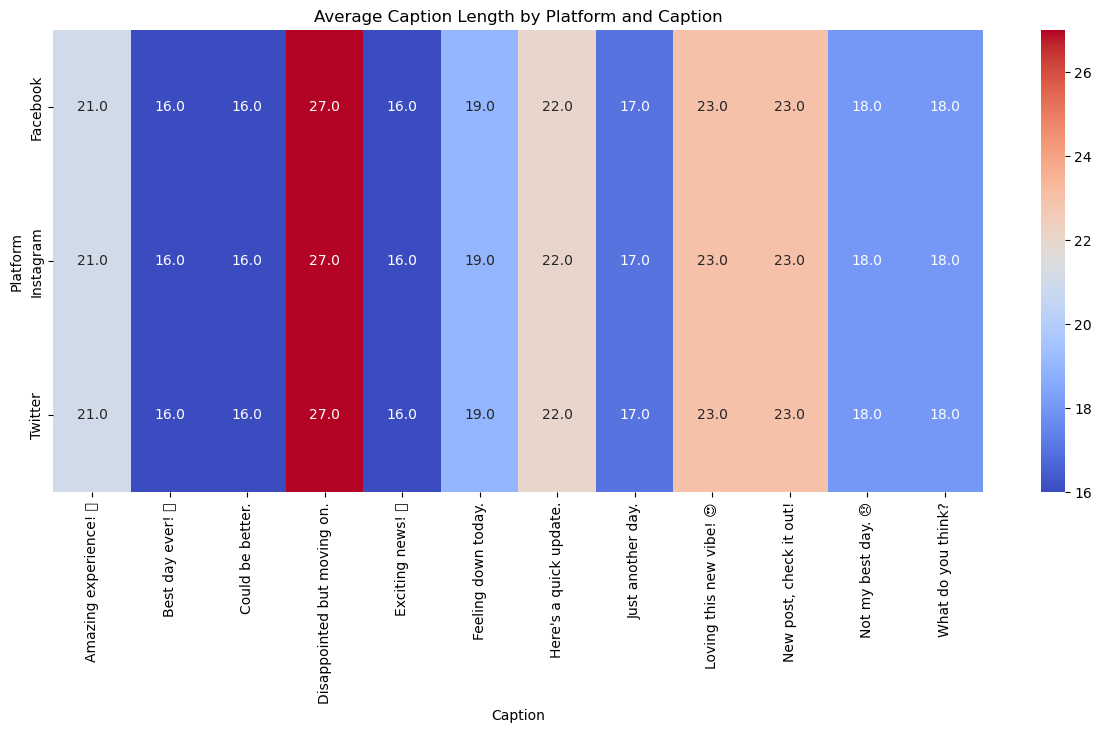

In [64]:
# Group by platform and caption and calculate the mean caption length
platform_cap_caplen_mean = SME1.groupby(['platform', 'caption'])['caption_length'].mean()

# Unstack to create a DataFrame with platforms as rows and captions as columns
platform_cap_caplen_mean_df = platform_cap_caplen_mean.unstack()

# Create a heatmap
sns.heatmap(platform_cap_caplen_mean_df, annot=True, cmap='coolwarm', fmt='.1f')

# Add labels and title
plt.xlabel('Caption')
plt.ylabel('Platform')
plt.title('Average Caption Length by Platform and Caption')

# Show the plot
plt.show()


In [65]:
platform_ph_num_ht_count = SME1.groupby(['platform', 'post_day', 'hashtags'])['num_hashtags'].count().reset_index()
platform_ph_num_ht_count

platform   post_day                            hashtags  num_hashtags
0    Facebook     Friday                          #Community             4
1    Facebook     Friday                 #Community, #Events             1
2    Facebook     Friday        #Community, #Events, #Social             1
3    Facebook     Friday        #Community, #Family, #Social             1
4    Facebook     Friday                #Community, #Friends             1
..        ...        ...                                 ...           ...
731   Twitter  Wednesday                           #Trending             1
732   Twitter  Wednesday  #Trending, #Entertainment, #Sports             1
733   Twitter  Wednesday                    #Trending, #News             1
734   Twitter  Wednesday         #Trending, #News, #Politics             1
735   Twitter  Wednesday           #Trending, #News, #Sports             1

[736 rows x 4 columns]

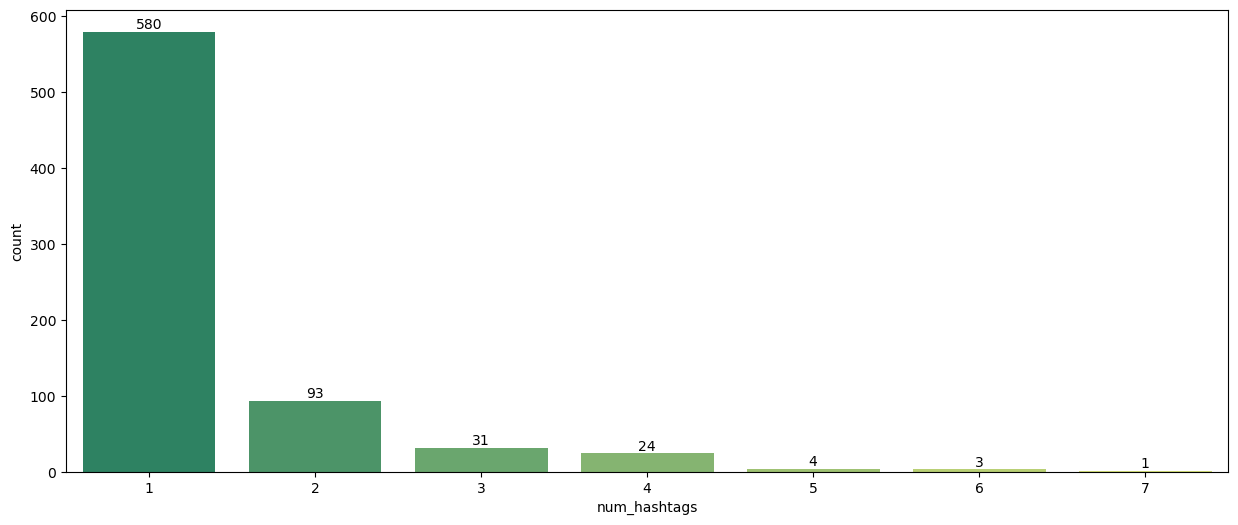

In [66]:
label=sns.countplot(x=SME1.groupby(['platform', 'post_day', 'hashtags'])['num_hashtags'].count(),data=platform_ph_num_ht_count,palette='summer')
for i in label.containers:
    label.bar_label(i)

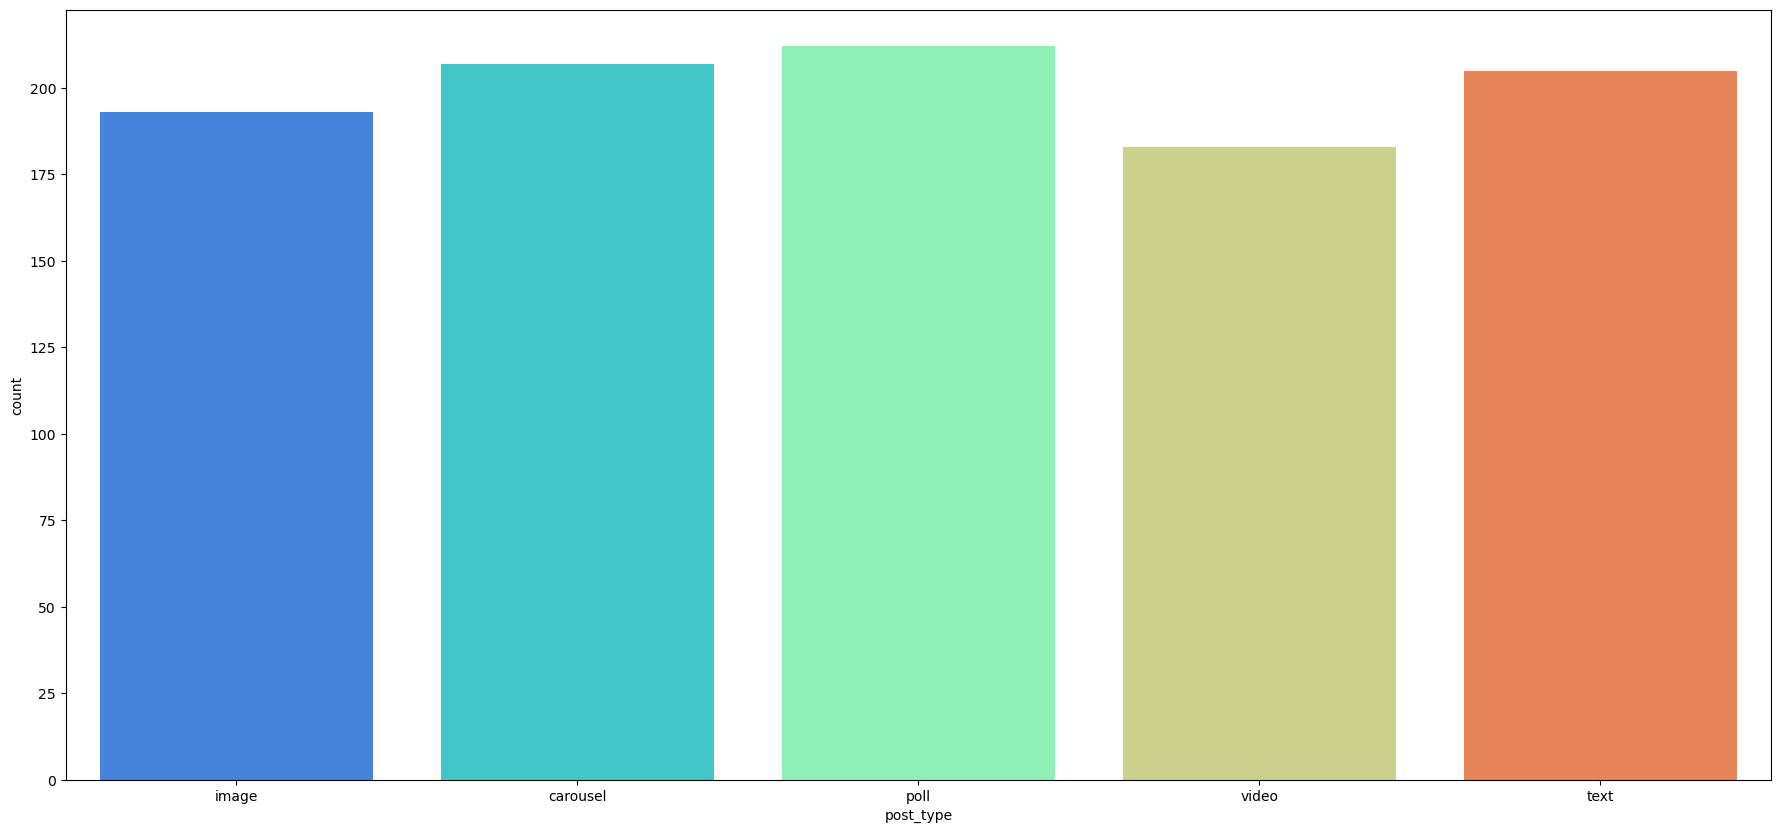

In [67]:
plt.figure(figsize=(22,10))
sns.countplot(x=SME1['post_type'],palette='rainbow')
plt.show()

In [68]:
SME1['post_day'].value_counts()

post_day
Tuesday      155
Wednesday    152
Thursday     147
Friday       146
Saturday     143
Monday       134
Sunday       123
Name: count, dtype: int64

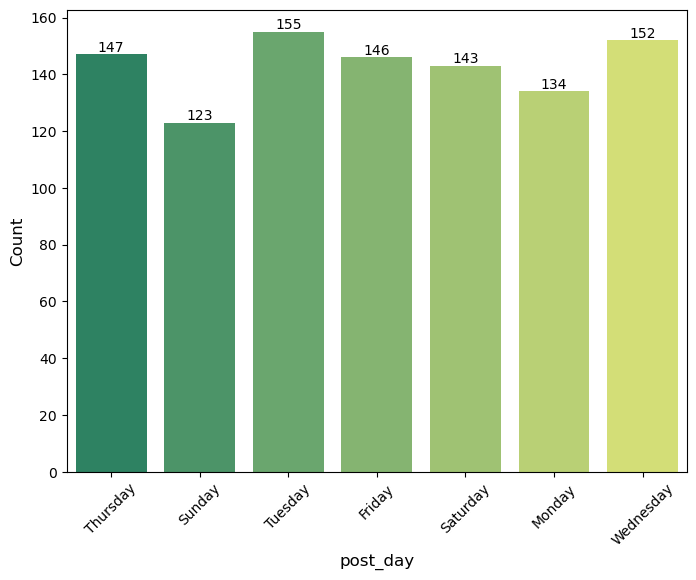

In [69]:
plt.figure(figsize=(8, 6))
label=sns.countplot(data=SME1, x='post_day', palette='summer')
for i in label.containers:
    label.bar_label(i)
plt.xlabel('post_day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [70]:
SME1['sentiment_score'].value_counts()

sentiment_score
positive    343
neutral     336
negative    321
Name: count, dtype: int64

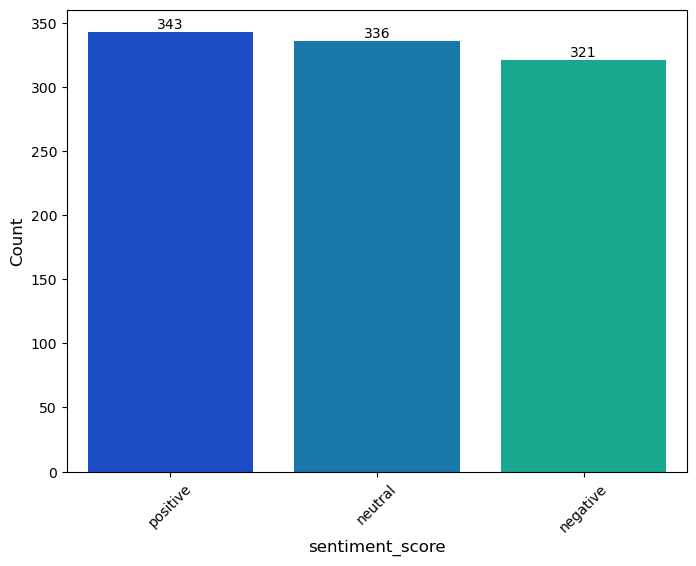

In [71]:
plt.figure(figsize=(8, 6))
label=sns.countplot(data=SME1, x='sentiment_score', palette='winter')
for i in label.containers:
    label.bar_label(i)
plt.xlabel('sentiment_score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [72]:
platform_sc_cap_caplen_count = SME1.groupby(['platform', 'sentiment_score', 'caption'])['caption_length'].count().reset_index()
platform_sc_cap_caplen_count

platform sentiment_score                      caption  caption_length
0    Facebook        negative             Could be better.              29
1    Facebook        negative  Disappointed but moving on.              28
2    Facebook        negative          Feeling down today.              21
3    Facebook        negative           Not my best day. 😞              32
4    Facebook         neutral       Here's a quick update.              33
5    Facebook         neutral            Just another day.              32
6    Facebook         neutral      New post, check it out!              34
7    Facebook         neutral           What do you think?              24
8    Facebook        positive        Amazing experience! 🌟              26
9    Facebook        positive             Best day ever! 🎉              22
10   Facebook        positive             Exciting news! 🚀              21
11   Facebook        positive      Loving this new vibe! 😍              25
12  Instagram        negative             Could be better.              28
13  Instagram        negative  Disappointed but moving on.              28
14  Instagram        negative          Feeling down today.              28
15  Instagram        negative           Not my best day. 😞              32
16  Instagram         neutral       Here's a quick update.              26
17  Instagram         neutral            Just another day.              32
18  Instagram         neutral      New post, check it out!              27
19  Instagram         neutral           What do you think?              23
20  Instagram        positive        Amazing experience! 🌟              21
21  Instagram        positive             Best day ever! 🎉              31
22  Instagram        positive             Exciting news! 🚀              30
23  Instagram        positive      Loving this new vibe! 😍              39
24    Twitter        negative             Could be better.              19
25    Twitter        negative  Disappointed but moving on.              25
26    Twitter        negative          Feeling down today.              23
27    Twitter        negative           Not my best day. 😞              28
28    Twitter         neutral       Here's a quick update.              28
29    Twitter         neutral            Just another day.              24
30    Twitter         neutral      New post, check it out!              24
31    Twitter         neutral           What do you think?              29
32    Twitter        positive        Amazing experience! 🌟              33
33    Twitter        positive             Best day ever! 🎉              34
34    Twitter        positive             Exciting news! 🚀              32
35    Twitter        positive      Loving this new vibe! 😍              29

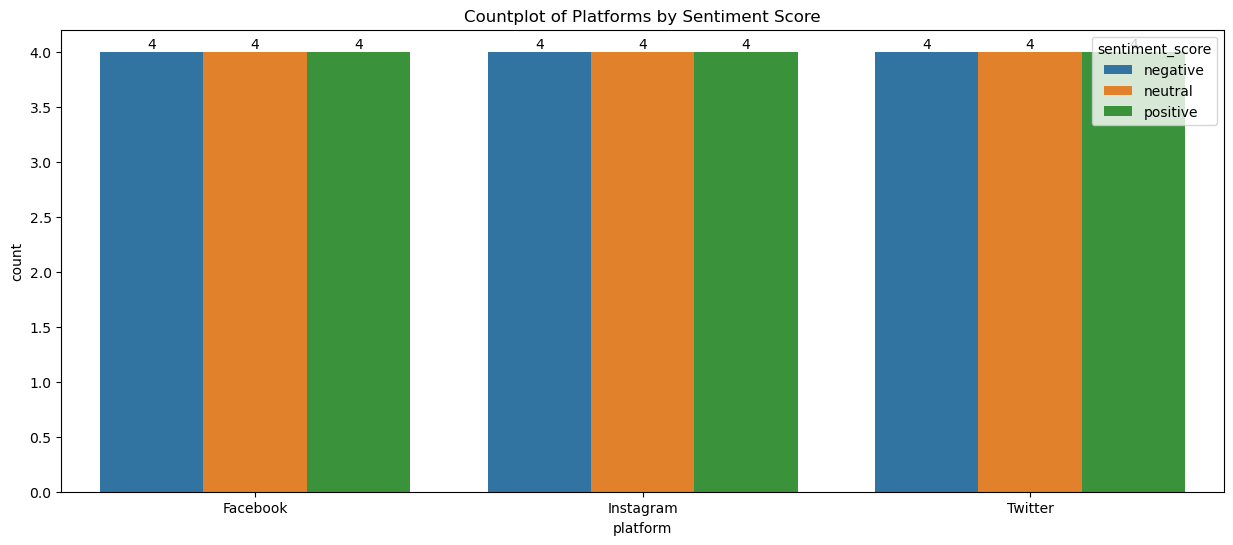

In [73]:
x=sns.countplot(x='platform', hue='sentiment_score', data=platform_sc_cap_caplen_count)
for i in x.containers:
    x.bar_label(i)

plt.title('Countplot of Platforms by Sentiment Score')
plt.show()

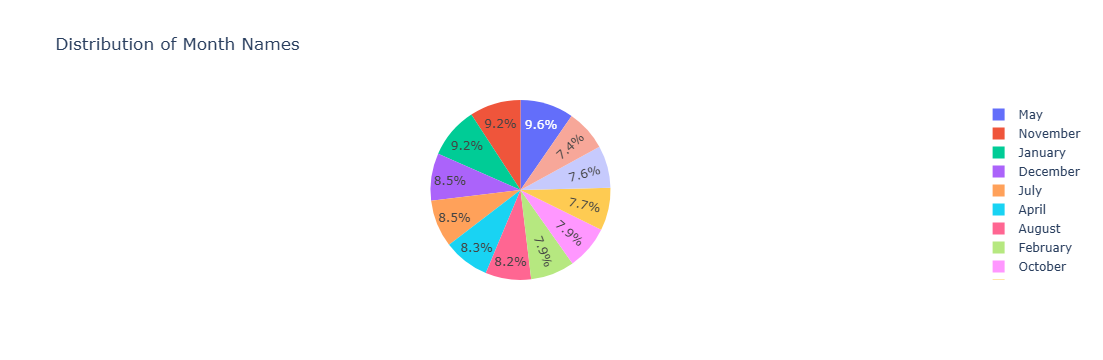

In [74]:
month_counts = SME1['month_name'].value_counts().reset_index()

month_counts.columns = ['Month', 'Count']

# Create a pie chart using Plotly
fig = px.pie(month_counts, names='Month', values='Count', title='Distribution of Month Names')

# Show the pie chart
fig.show()

In [76]:
SME1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   platform         1000 non-null   object
 1   post_type        1000 non-null   object
 2   caption          1000 non-null   object
 3   hashtags         1000 non-null   object
 4   likes            1000 non-null   int64 
 5   comments         1000 non-null   int64 
 6   shares           1000 non-null   int64 
 7   caption_length   1000 non-null   int64 
 8   num_hashtags     1000 non-null   int64 
 9   post_hour        1000 non-null   int64 
 10  post_day         1000 non-null   object
 11  sentiment_score  1000 non-null   object
 12  day              1000 non-null   int32 
 13  month            1000 non-null   int32 
 14  year             1000 non-null   int32 
 15  month_name       1000 non-null   object
 16  hour             1000 non-null   int32 
 17  min              1000 non-null   i

In [77]:
# Grouping the data by 'platform', 'sentiment_score', 'caption', and 'month_name'
platform_sc_cap_monname_count = SME1.groupby(['platform', 'sentiment_score', 'caption', 'month_name'])['post_hour'].count().reset_index()
platform_sc_cap_monname_count


platform sentiment_score                  caption month_name  post_hour
0    Facebook        negative         Could be better.      April          4
1    Facebook        negative         Could be better.     August          3
2    Facebook        negative         Could be better.   December          3
3    Facebook        negative         Could be better.   February          2
4    Facebook        negative         Could be better.    January          3
..        ...             ...                      ...        ...        ...
383   Twitter        positive  Loving this new vibe! 😍      March          1
384   Twitter        positive  Loving this new vibe! 😍        May          3
385   Twitter        positive  Loving this new vibe! 😍   November          2
386   Twitter        positive  Loving this new vibe! 😍    October          1
387   Twitter        positive  Loving this new vibe! 😍  September          3

[388 rows x 5 columns]

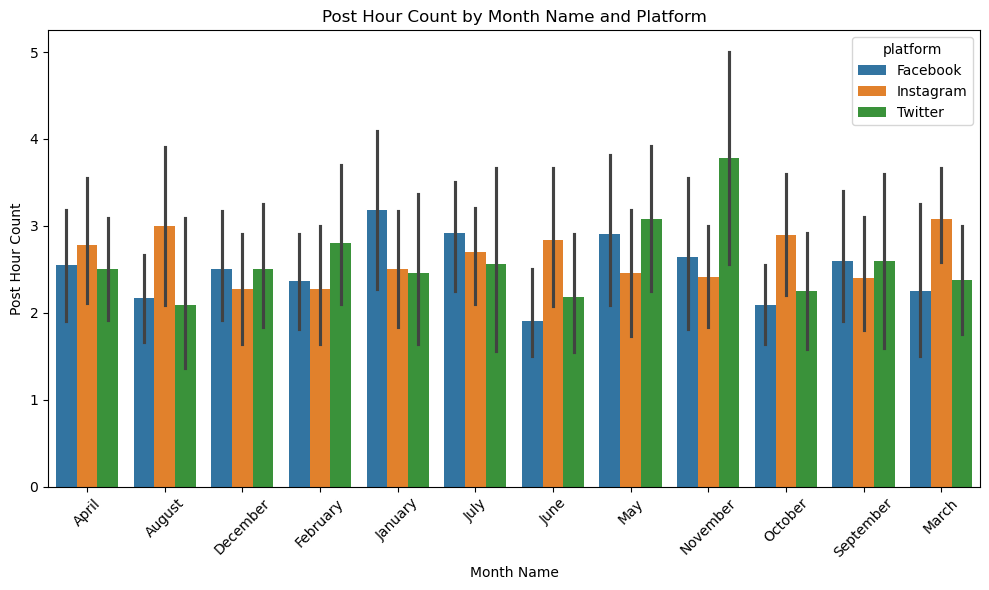

In [78]:
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='month_name', y='post_hour', hue='platform', data=platform_sc_cap_monname_count)

# Set plot labels and title
plt.title('Post Hour Count by Month Name and Platform')
plt.xlabel('Month Name')
plt.ylabel('Post Hour Count')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [79]:
SME1.to_csv("cleaned_social_media_engagement.csv")#for Storing clean data